Equation 1: $\frac{\ddot{a}(t)}{a(t)} = - \frac{4\pi G}{3c^{2}}[\varepsilon(t) + 3P(t)] \rightarrow \ddot{a}(t) = - \frac{4\pi G}{3c^{2}} [\varepsilon(t) + 3P(t)] \cdot a(t)$ 

Equation 2: $(\frac{\dot{a}(t)}{a(t)})^{2} = \frac{8\pi G \varepsilon(t)}{3c^{2}} - \frac{k c^{2}}{a(t)^{2}} \rightarrow \frac{\dot{a}(t)^{2}}{a(t)^{2}} = \frac{8\pi G \varepsilon(t)}{3c^{2}} - \frac{k c^{2}}{a(t)^{2}}$

$\rightarrow \dot{a}(t)^{2} = \frac{8\pi G \varepsilon(t)}{3c^{2}} a(t)^{2} - k c^{2}$

Taking the derivative with respect to time $\rightarrow 2\dot{a}(t) \cdot \ddot{a}(t) = \frac{8\pi G \dot{\varepsilon(t)}}{3c^{2}} a(t)^{2} + \frac{8\pi G \varepsilon(t)}{3c^{2}} 2a(t) \cdot \dot{a}(t)$

$\rightarrow \ddot{a(t)} = \frac{4\pi G \dot{\varepsilon(t)}}{3c^{2} \dot{a}(t)} a(t)^{2} + \frac{8\pi G \varepsilon(t)}{3c^{2}} a(t)$

Plugging the derivative into equation 1 $\rightarrow \frac{4\pi G \dot{\varepsilon(t)}}{3c^{2} \dot{a}(t)} a(t)^{2} + \frac{8\pi G \varepsilon(t)}{3c^{2}} a(t) = - \frac{4\pi G}{3c^{2}} [\varepsilon(t) + 3P(t)] \cdot a(t)$

$\rightarrow \frac{4\pi G}{3c^{2}} \cdot (\frac{\dot{\varepsilon(t)}}{\dot{a}(t)}a(t)^{2} + 2\varepsilon(t) \cdot a(t)) = - \frac{4\pi G}{3c^{2}} [\varepsilon(t) + 3P(t)] \cdot a(t)$

$\rightarrow \frac{\dot{\varepsilon(t)}}{\dot{a(t)}}a(t)^{2} + 2\varepsilon(t) \cdot a(t) = -(\varepsilon(t) + 3P(t)) \cdot a(t)$

$\rightarrow \frac{\dot{\varepsilon(t)}}{\dot{a(t)}} \cdot a(t) + 2\varepsilon(t) = -\varepsilon(t) - 3P(t)$

$\rightarrow \dot{\varepsilon(t)} \frac{a(t)}{\dot{a(t)}} + 3\varepsilon(t) + 3P(t) = 0 \rightarrow \dot{\varepsilon(t)} \frac{a(t)}{\dot{a(t)}} + 3(\varepsilon(t) + P(t)) = 0$

$\rightarrow \dot{\varepsilon(t)} + \frac{3 \dot{a(t)}}{a(t)}(\varepsilon(t) + P(t)) = 0$

$--------------------------------------------$

Comoving distance: $r = \int \frac{c dt}{a(t)} = \int_0^{z} \frac{c dz}{H(z)}$ 

where $\frac{dz}{dt} = \frac{H(z)}{a(t)}$

$\rightarrow \frac{c}{a(t)} \int dt = \int_0^{z} \frac{cdz}{H(z)} \rightarrow \int dt = a(t) \int_0^{z} \frac{dz}{H(z)}$

$\rightarrow t_o - t_e = \int_0^{z} \frac{dz}{(1 + z)H(z)}$ to be intergrated numerically using the quadrature method of numerical intergration.

where $(\frac{H(z)}{H_0})^{2} = \Omega_{r,0}(1 + z)^{4} + \Omega_{m,0}(1 + z)^{3} + \Omega_{\Lambda,0} + (1 - \Omega_0)(1 + z)^{2}$

$ \rightarrow H(z) = H_0 (\Omega_{r,0}(1 + z)^{4} + \Omega_{m,0}(1 + z)^{3} + \Omega_{\Lambda,0} + (1 - \Omega_0)(1 + z)^{2})^{\frac{1}{2}}$

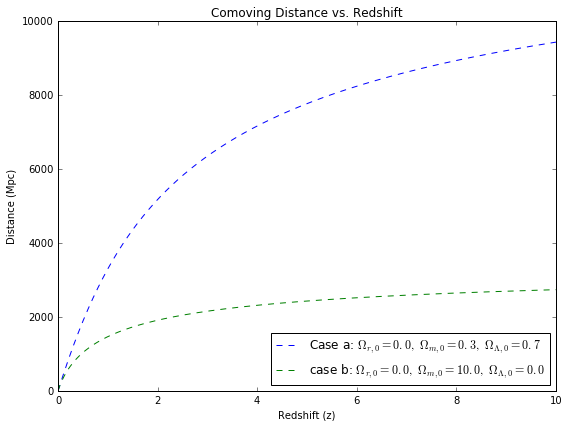

In [5]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import quad


H_s = 2.2683e-18 #Hubble constant in s^{-1}
H_gyr = 0.07154 #Hubble constant in Gyr^{-1}
c = 299792458.0 #speed of light in m*s^{-1}


def H_z(H_0, Om_r, Om_m, Om_l, Om_0, z):
    Om_0 = (Om_r + Om_m + Om_l)
    return H_0 * np.sqrt(Om_r * (1.0 + z) ** 4.0 + Om_m * (1.0 + z) ** 3.0 + Om_l + (1.0 - Om_0) * (1.0 + z) ** 2.0)


case_a = lambda z: c / H_z(H_s, 0.0, 0.3, 0.7, 0.0, z)
case_b = lambda z: c / H_z(H_s, 0.0, 10.0, 0.0, 1.0, z) 
case_a_done = np.array([])
case_b_done = np.array([])
z = np.linspace(0, 10, 500) #redshift zero to ten


#intergration in quadrature
for i in z:
    current = quad(case_a, 0, i)
    case_a_done = np.append(case_a_done, current[0])
    current = quad(case_b, 0, i)
    case_b_done = np.append(case_b_done, current[0])
    

case_a_mpc = case_a_done * 3.24e-23 #convert to Mpc
case_b_mpc = case_b_done * 3.24e-23  #convert to Mpc


plt.figure(figsize=(8,6))
plt.plot(z, case_a_mpc, 'b--', label="Case a: $\Omega_{r,0}=0.0,\ \Omega_{m,0}=0.3,\ \Omega_{\Lambda,0}=0.7$")
plt.plot(z, case_b_mpc, 'g--', label="case b: $\Omega_{r,0}=0.0,\ \Omega_{m,0}=10.0,\ \Omega_{\Lambda,0}=0.0$")

plt.xlabel("Redshift (z)")
plt.ylabel("Distance (Mpc)")
plt.title("Comoving Distance vs. Redshift")
plt.legend(loc='lower right', numpoints=1)

plt.tight_layout()
plt.show()

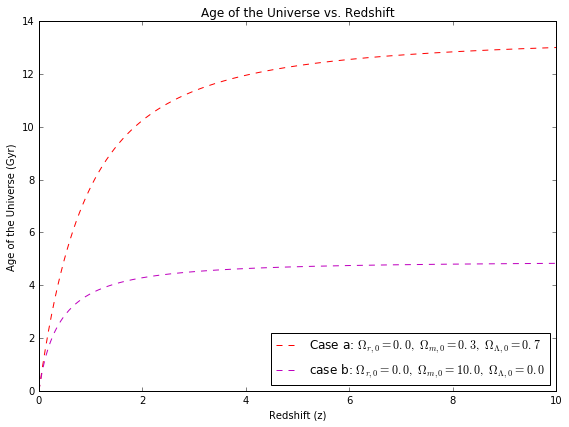

In [6]:
a_time = lambda z: 1.0 /  ((1.0 + z) * H_z(H_gyr, 0.0, 0.3, 0.7, 0.0, z))
b_time = lambda z: 1.0 /  ((1.0 + z) * H_z(H_gyr, 0.0, 10.0, 0.0, 1.0, z)) 
a_time_done = np.array([])
b_time_done = np.array([])


#integration in quadrature
for j in z:
    current = quad(a_time, 0, j)
    a_time_done = np.append(a_time_done, current[0])
    current = quad(b_time, 0, j)
    b_time_done = np.append(b_time_done, current[0])
    
    
plt.figure(figsize=(8,6))
plt.plot(z, a_time_done, 'r--', label="Case a: $\Omega_{r,0}=0.0,\ \Omega_{m,0}=0.3,\ \Omega_{\Lambda,0}=0.7$")
plt.plot(z, b_time_done, 'm--', label="case b: $\Omega_{r,0}=0.0,\ \Omega_{m,0}=10.0,\ \Omega_{\Lambda,0}=0.0$")

plt.xlabel("Redshift (z)")
plt.ylabel("Age of the Universe (Gyr)")
plt.title("Age of the Universe vs. Redshift")
plt.legend(loc='lower right', numpoints=1)

plt.tight_layout()
plt.show()

$--------------------------------------------$

In [7]:
bench_age = quad(a_time, 0, 100)[0] #age of our benchmark flat universe

Om_rad = 0.0 #radiation density in a radiation dominated, open universe

c_time = lambda z: 1.0 / ((1.0 + z) * H_z(H_gyr, Om_rad, 0.0, 0.0, -1.0, z))
c_age = quad(c_time, 0, 10000)[0]


error = 0.00001 #a resolution for decimal point accuracy

while(c_age >= bench_age):
    Om_rad += error
    c_time = lambda z: 1.0 / ((1.0 + z) * H_z(H_gyr, Om_rad, 0.0, 0.0, -1.0, z))
    c_age = quad(c_time, 0, 10000)[0]


print "Age of the benchmark universe =", bench_age, "Gyr" 
print "Age of a radiation only open universe =", c_age,"Gyr" 
print "Age difference between the benchmark universe and a radiation only universe =", abs(bench_age - c_age), "Gyr" 
print "Energy density parameter =", Om_rad

Age of the benchmark universe = 13.4596065514 Gyr
Age of a radiation only open universe = 13.4586801115 Gyr
Age difference between the benchmark universe and a radiation only universe = 0.000926439866134 Gyr
Energy density parameter = 0.00149
